# Airbnb Data Analysis for New York City

## Introduction

Airbnb, an online marketplace for lodging, has transformed the way people travel and find accommodations. In major cities like New York City, Airbnb listings provide a wide variety of options for travelers, ranging from entire apartments and homes to private rooms in shared apartments. This flexibility has made Airbnb a popular choice among both tourists and business travelers.

In this notebook, we will explore the Airbnb dataset for New York City. This dataset provides detailed information on listings available on Airbnb, including prices, locations, types of properties, and reviews. By analyzing this data, we can gain insights into the rental market in New York City, understand pricing strategies, identify popular neighborhoods, and much more.

## Dataset Description

The dataset used in this analysis is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a website that provides publicly available data on Airbnb listings. The New York City dataset contains various attributes for each listing, including:

- **Listing ID**: A unique identifier for each Airbnb listing.
- **Name**: The name of the listing.
- **Host ID**: A unique identifier for the host.
- **Host Name**: The name of the host.
- **Neighborhood Group**: The general area or borough where the listing is located (e.g., Manhattan, Brooklyn).
- **Neighborhood**: The specific neighborhood within the borough.
- **Latitude**: The latitude coordinate of the listing.
- **Longitude**: The longitude coordinate of the listing.
- **Room Type**: The type of room being offered (e.g., entire home/apt, private room, shared room).
- **Price**: The price per night for the listing.
- **Minimum Nights**: The minimum number of nights a guest must stay.
- **Number of Reviews**: The total number of reviews for the listing.
- **Last Review**: The date of the last review.
- **Reviews per Month**: The average number of reviews per month.
- **Calculated Host Listings Count**: The total number of listings by the host.
- **Availability 365**: The number of days the listing is available in a year.

## Objectives

In this analysis, we aim to achieve the following objectives:

1. **Data Exploration**: Understand the structure and contents of the dataset through summary statistics and visualizations.
2. **Price Analysis**: Analyze the pricing strategies of different types of listings and identify factors influencing prices.
3. **Geographical Analysis**: Examine the geographical distribution of listings and identify popular neighborhoods.
4. **Review Analysis**: Investigate the review patterns and their correlation with listing popularity and price.
5. **Availability Analysis**: Analyze the availability of listings and identify trends related to booking frequency.




In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read data

df = pd.read_csv("data/listings.csv")
df.head()

id                                               name  host_id  \
0  5121                                    BlissArtsSpace!     7356   
1  5136   Quiet Family Friendly Duplex w/ Patio + Backyard     7378   
2  6848                   Only 2 stops to Manhattan studio    15991   
3  6872  Uptown Sanctuary w/ Private Bath (Month to Month)    16104   
4  6990                            UES Beautiful Blue Room    16800   

       host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0          Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
1        Rebecca            Brooklyn         Sunset Park  40.66265  -73.99454   
2  Allen & Irina            Brooklyn        Williamsburg  40.70935  -73.95342   
3            Kae           Manhattan         East Harlem  40.80107  -73.94255   
4            Cyn           Manhattan         East Harlem  40.78778  -73.94759   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room   72.0              30                 50  2019-12-02   
1  Entire home/apt  253.0              30                  4  2023-08-20   
2  Entire home/apt   81.0              30                192  2024-01-08   
3     Private room   65.0              30                  1  2022-06-05   
4     Private room   60.0              30                247  2024-03-06   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.28                               2               233   
1               0.03                               1                47   
2               1.06                               1               164   
3               0.04                               2               365   
4               1.40                               1               179   

   number_of_reviews_ltm license  
0                      0     NaN  
1                      1     NaN  
2                      3     NaN  
3                      0     NaN  
4                      3     NaN

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38377 entries, 0 to 38376
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38377 non-null  int64  
 1   name                            38375 non-null  object 
 2   host_id                         38377 non-null  int64  
 3   host_name                       38372 non-null  object 
 4   neighbourhood_group             38377 non-null  object 
 5   neighbourhood                   38377 non-null  object 
 6   latitude                        38377 non-null  float64
 7   longitude                       38377 non-null  float64
 8   room_type                       38377 non-null  object 
 9   price                           23761 non-null  float64
 10  minimum_nights                  38377 non-null  int64  
 11  number_of_reviews               38377 non-null  int64  
 12  last_review                     

# Exploratory Data Analysis

In [4]:
# Remove the 'last_review' column
df.drop(columns=['name'], inplace=True)
df.drop(columns=['host_name'], inplace=True)
df.drop(columns=['last_review'], inplace=True)
df.drop(columns=['license'], inplace=True)
df.drop(columns=['host_id'], inplace=True)
df.drop(columns=['id'], inplace=True)

# Count unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")
unique_counts = df[categorical_columns].nunique()
print("Number of unique features in each categorical column:")
print(unique_counts)

df.info()

Categorical columns: Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')
Number of unique features in each categorical column:
neighbourhood_group      5
neighbourhood          225
room_type                4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38377 entries, 0 to 38376
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38377 non-null  object 
 1   neighbourhood                   38377 non-null  object 
 2   latitude                        38377 non-null  float64
 3   longitude                       38377 non-null  float64
 4   room_type                       38377 non-null  object 
 5   price                           23761 non-null  float64
 6   minimum_nights                  38377 non-null  int64  
 7   number_of_reviews               38377 non-null  int64  
 8   reviews_per_month             

Missing values per column before cleaning:
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             14616
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 11611
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64
Shape of data before cleaning
(38377, 12)
Number of unique neighborhoods before cleaning
225


<Figure size 1200x600 with 0 Axes>

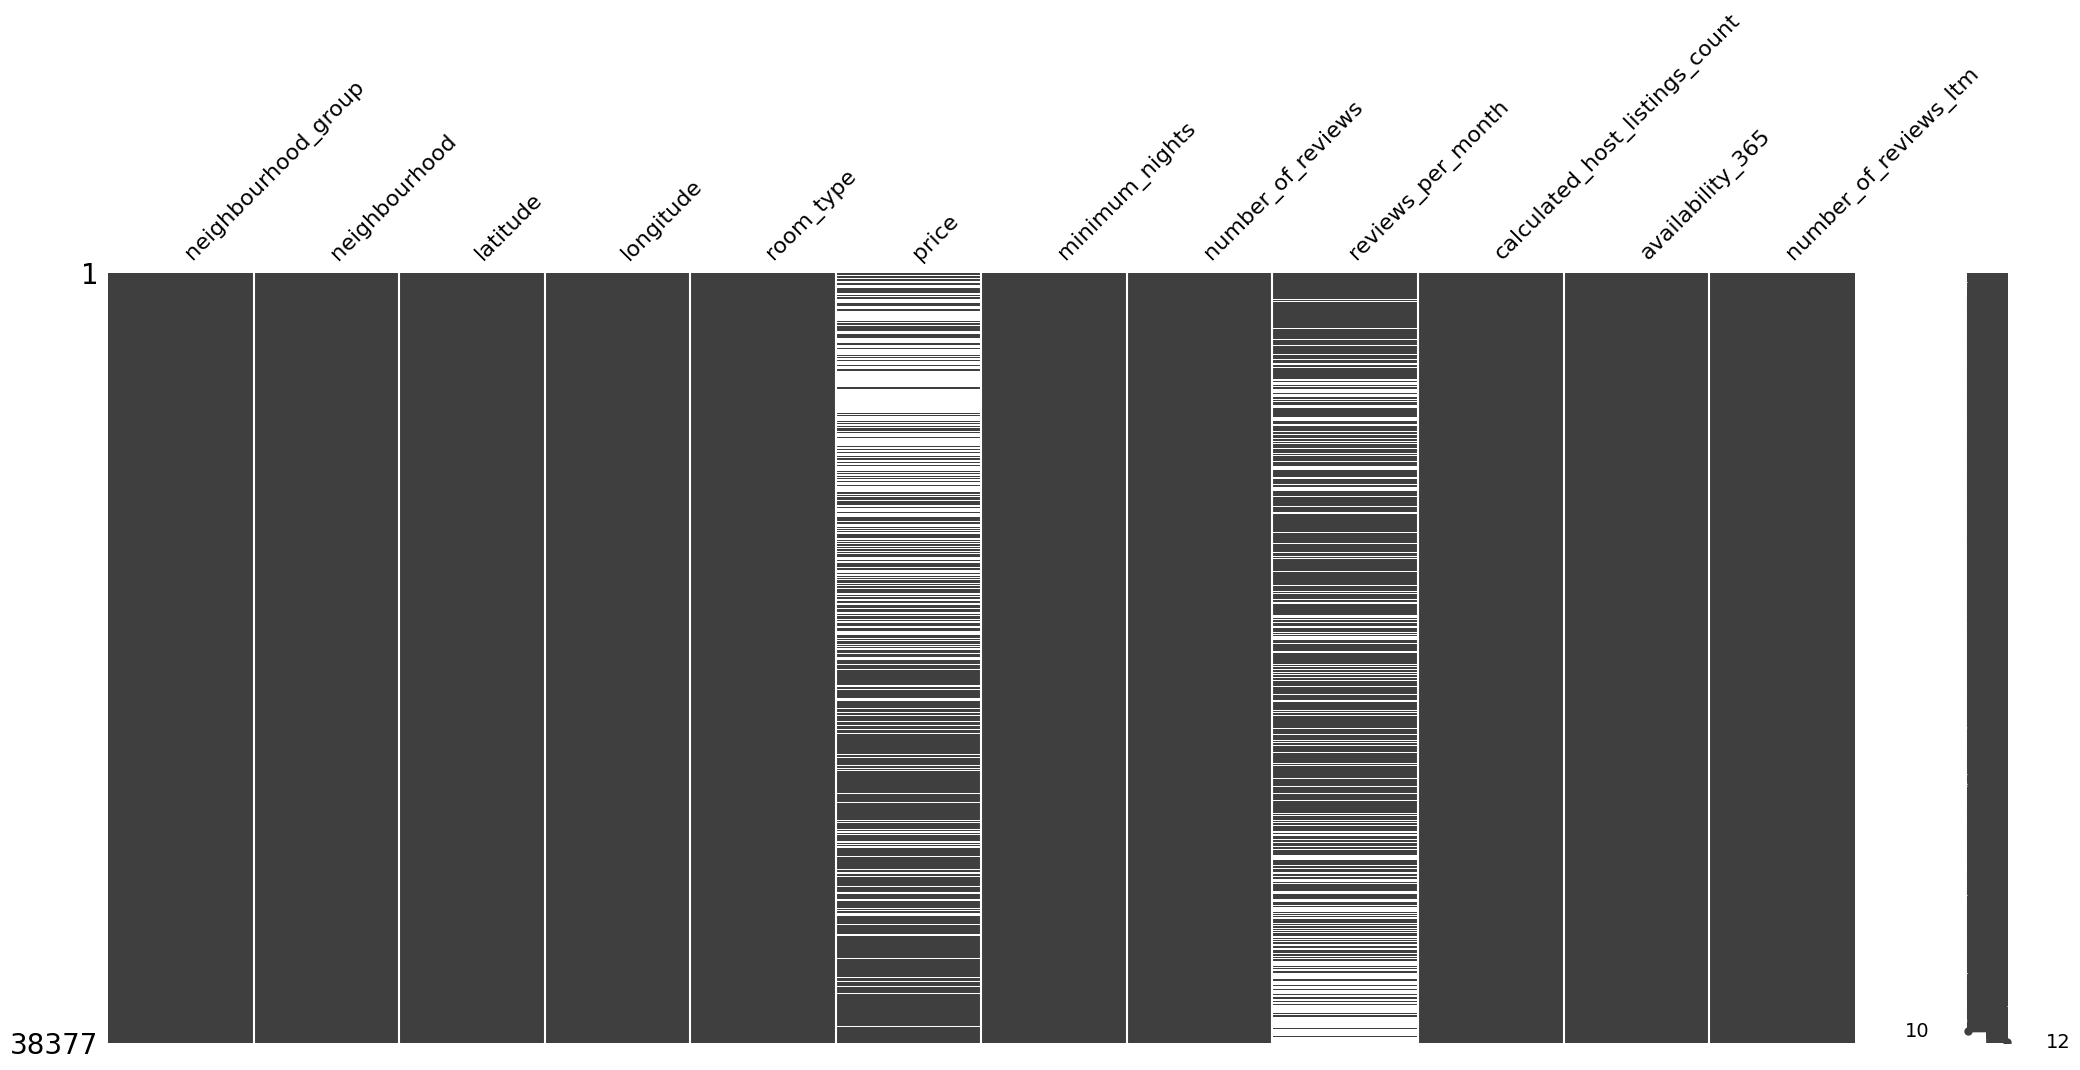

<Figure size 1200x600 with 0 Axes>

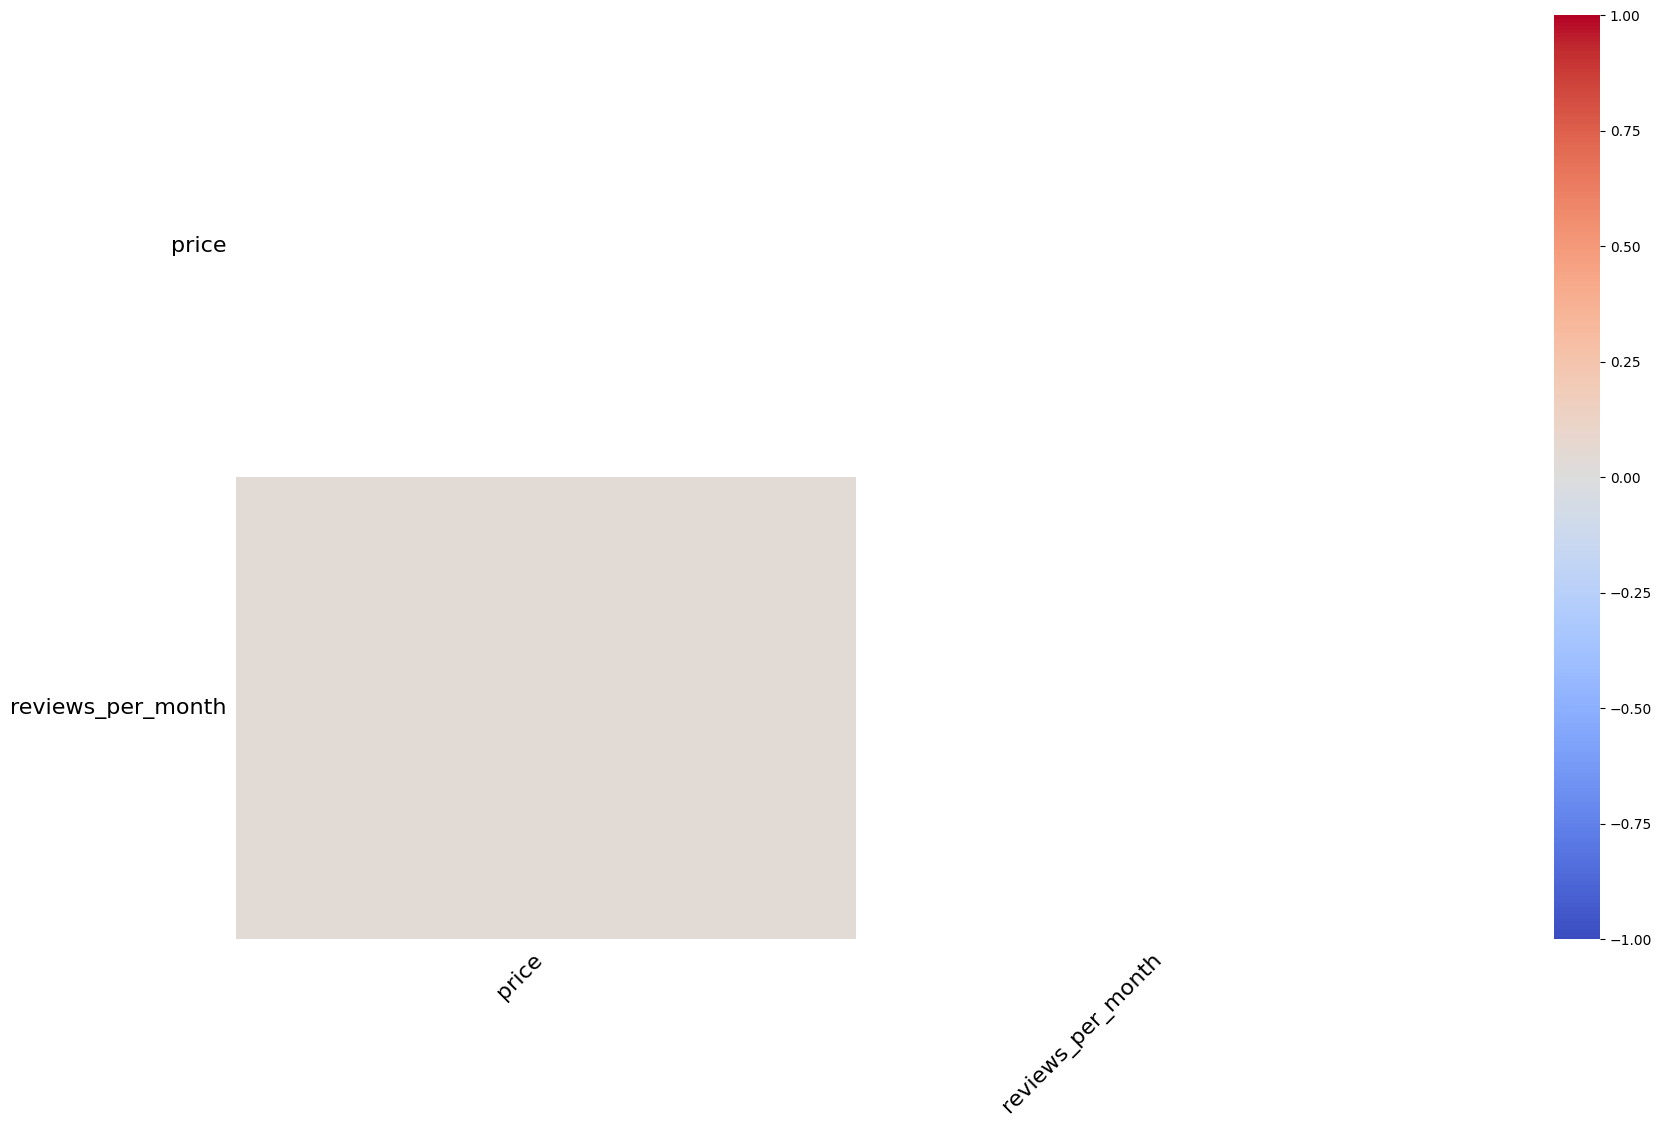

In [5]:
import missingno as msno

# Check for missing values
print("Missing values per column before cleaning:")
print(df.isnull().sum())

print('Shape of data before cleaning')
print(df.shape)

print('Number of unique neighborhoods before cleaning')
print(df['neighbourhood'].nunique())

# Visualize missing data
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.show()

# Visualize the missing data as a heatmap
plt.figure(figsize=(12, 6))
msno.heatmap(df, cmap='coolwarm')
plt.show()


## Removing rows with missing data

Find which neighborhoods are removed from the data after cleaning and add back those rows with the mean value

Missing values per column after cleaning:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64
Shape of data after cleaning:
(16947, 12)
Number of unique neighborhoods after cleaning:
219


<Figure size 1200x600 with 0 Axes>

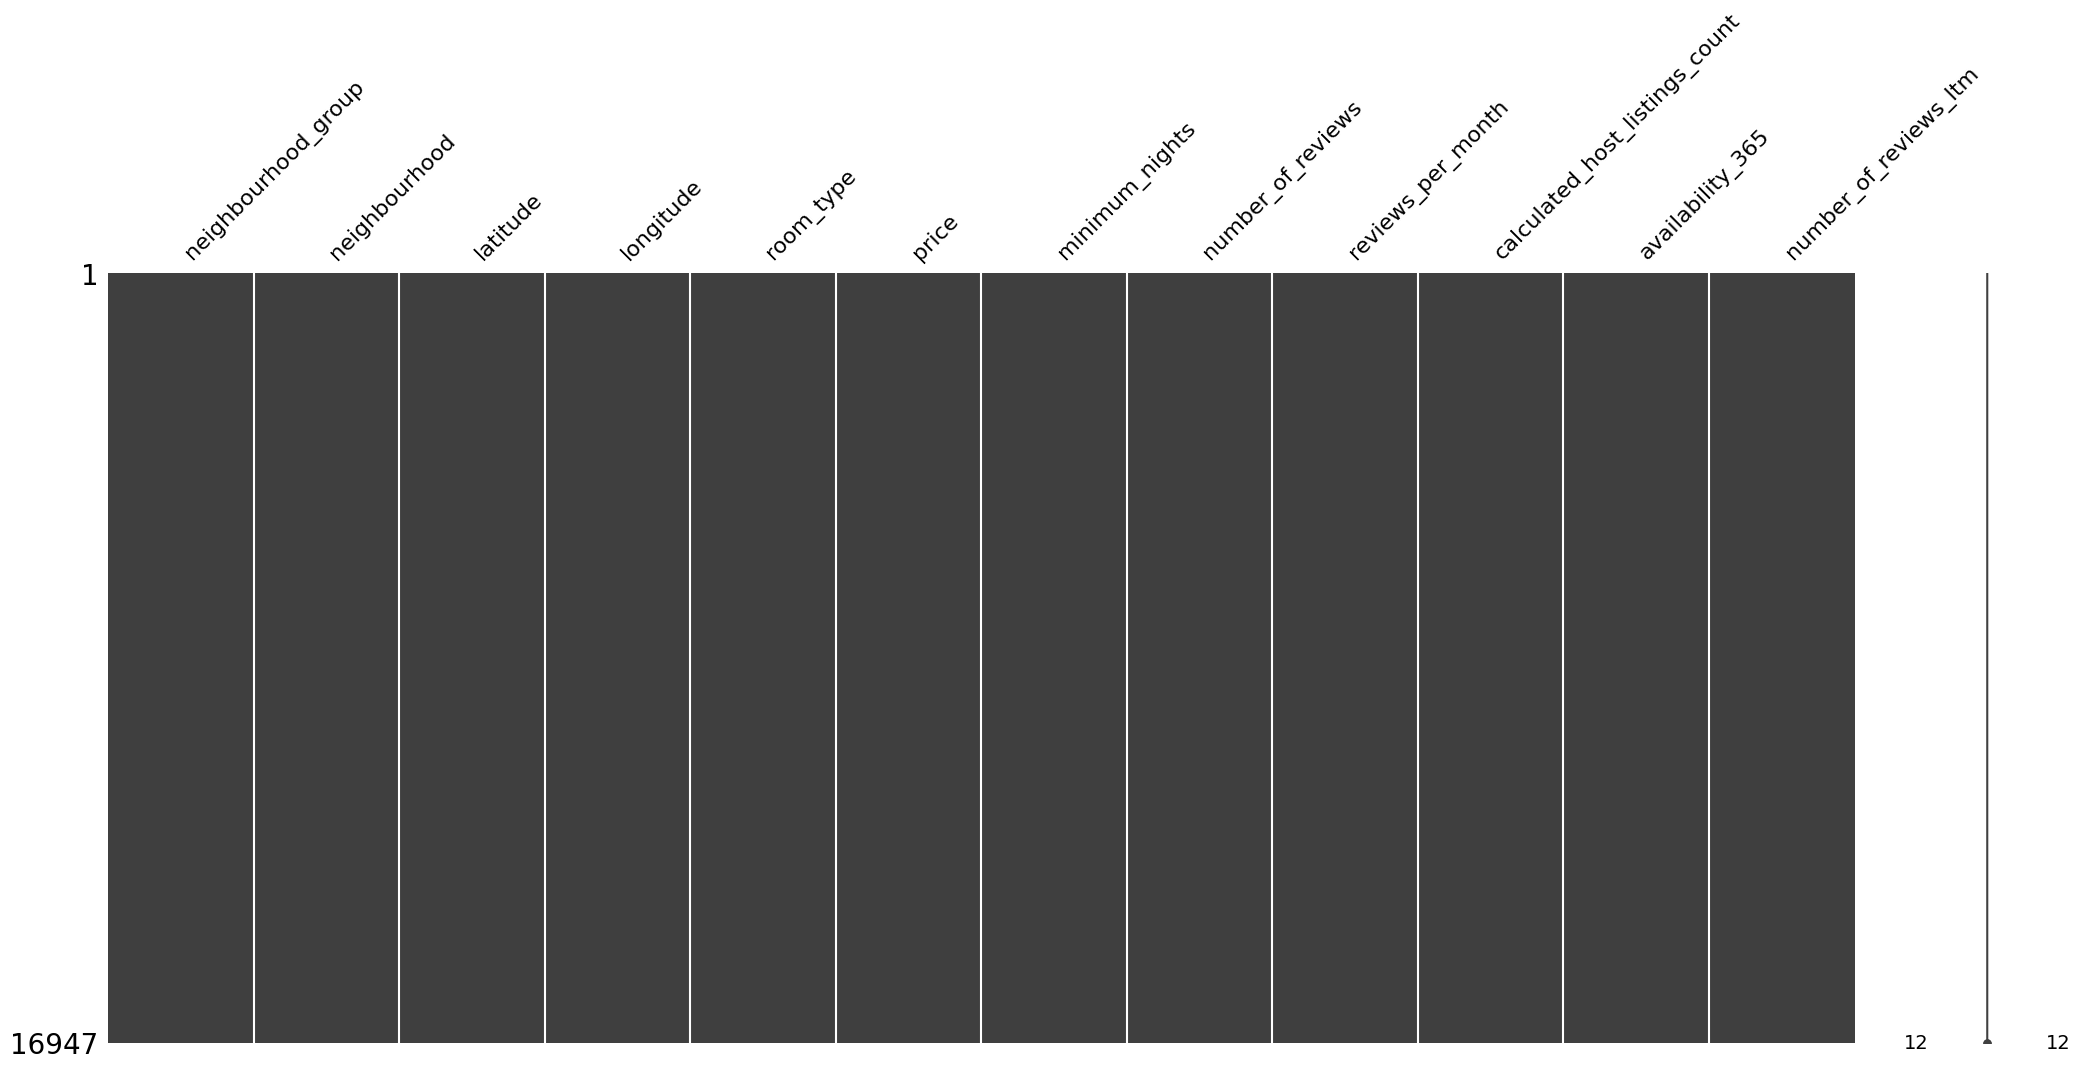

Removed neighborhoods: {'New Dorp', 'Dongan Hills', 'Oakwood', 'Fort Wadsworth', 'Hollis Hills', 'Rossville'}
Data after adding back removed neighborhoods:
  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
1            Brooklyn         Sunset Park  40.66265  -73.99454   
2            Brooklyn        Williamsburg  40.70935  -73.95342   
3           Manhattan         East Harlem  40.80107  -73.94255   
4           Manhattan         East Harlem  40.78778  -73.94759   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room   72.0            30.0               50.0   
1  Entire home/apt  253.0            30.0                4.0   
2  Entire home/apt   81.0            30.0              192.0   
3     Private room   65.0            30.0                1.0   
4     Private room   60.0            30.0              247.0   

   reviews_per_month  calculated_host_listings_count  availabi

In [6]:
# Clean up whitespace or empty strings
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Store the original unique neighborhoods
original_neighbourhoods = df['neighbourhood'].unique()

# Remove rows with any missing data
df_cleaned = df.dropna()

# Check for missing values after dropping rows with missing data
print("Missing values per column after cleaning:")
print(df_cleaned.isnull().sum())

print('Shape of data after cleaning:')
print(df_cleaned.shape)

print('Number of unique neighborhoods after cleaning:')
print(df_cleaned['neighbourhood'].nunique())

# Verify there are no more missing values with matrix plot
plt.figure(figsize=(12, 6))
msno.matrix(df_cleaned)
plt.show()

# Find which neighborhoods were removed
cleaned_neighbourhoods = df_cleaned['neighbourhood'].unique()
removed_neighbourhoods = set(original_neighbourhoods) - set(cleaned_neighbourhoods)
print(f"Removed neighborhoods: {removed_neighbourhoods}")

# Calculate mean values for numerical columns in the cleaned dataset
mean_values = df_cleaned.mean(numeric_only=True)

# Create a DataFrame for the removed neighborhoods with mean values
rows_to_add = []
for neighborhood in removed_neighbourhoods:
    mean_row = mean_values.copy()
    mean_row['neighbourhood'] = neighborhood
    rows_to_add.append(mean_row)

# Convert the list of Series to a DataFrame
mean_rows_df = pd.DataFrame(rows_to_add)

# Append the new rows to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, mean_rows_df], ignore_index=True)

# Verify the updated dataset
print("Data after adding back removed neighborhoods:")
print(df_cleaned.head())
print("Missing values per column after adding back removed neighborhoods:")
print(df_cleaned.isnull().sum())

# Display the first few rows after adding back the neighborhoods
print(df_cleaned.head())

# Verify the total number of unique neighborhoods
print(f"Total number of unique neighborhoods after adding back: {df_cleaned['neighbourhood'].nunique()}")

# Updating df with df_cleaned
df = df_cleaned

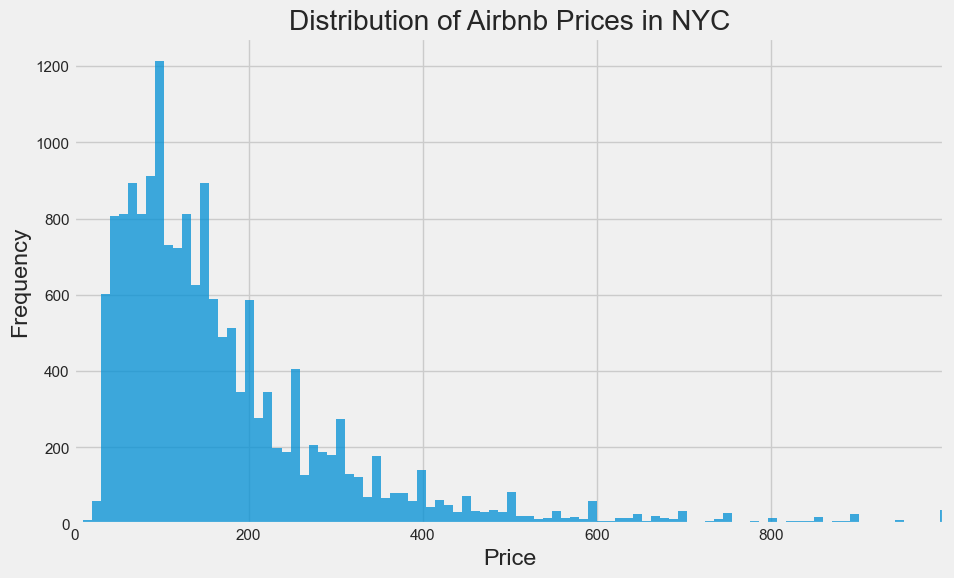

In [75]:
# Set styles for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # To limit the x-axis to the 99th percentile to avoid extreme outliers
plt.show()


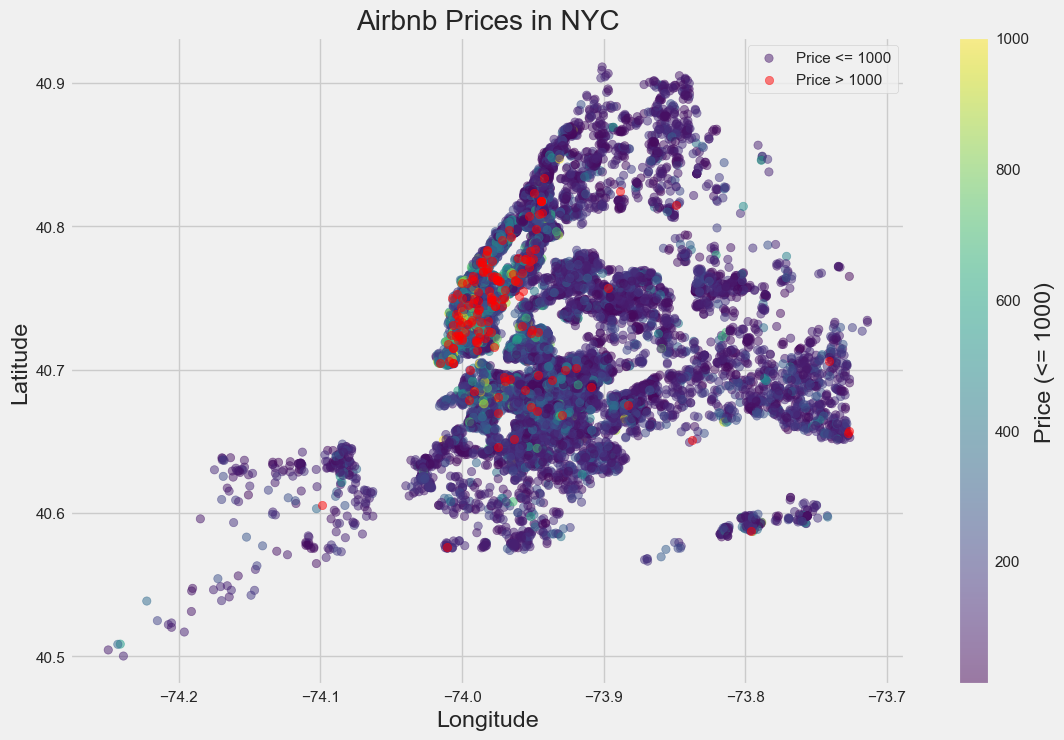

In [8]:

# Split the data into two groups
df_below_1000 = df[df['price'] <= 1000]
df_above_1000 = df[df['price'] > 1000]

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot for prices <= 1000
sc = plt.scatter(df_below_1000['longitude'], df_below_1000['latitude'], c=df_below_1000['price'], cmap='viridis', alpha=0.5, label='Price <= 1000')

# Scatter plot for prices > 1000
plt.scatter(df_above_1000['longitude'], df_above_1000['latitude'], color='red', alpha=0.5, label='Price > 1000')

# Add color bar for the price <= 1000 points
cbar = plt.colorbar(sc, label='Price (<= 1000)')

# Add titles and labels
plt.title('Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

The plot above shows the scatter plot of the price vs latitude-longitude. The prices above $1000 are marked by red.

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_7285/755991337.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


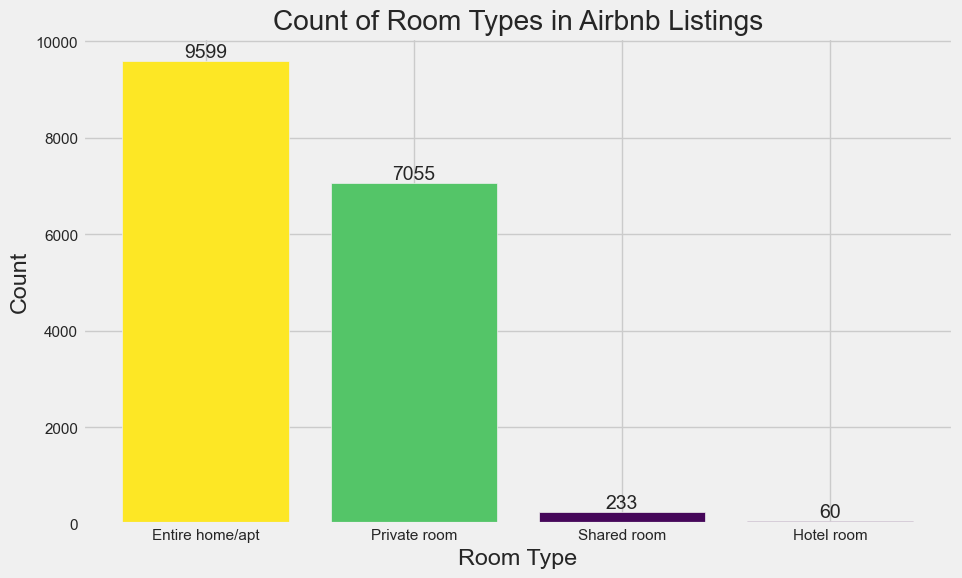

In [9]:
import matplotlib.cm as cm

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Get the viridis colormap
cmap = cm.get_cmap('viridis')

# Normalize the color range
norm = plt.Normalize(room_type_counts.min(), room_type_counts.max())
colors = cmap(norm(room_type_counts.values))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Add titles and labels
plt.title('Count of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

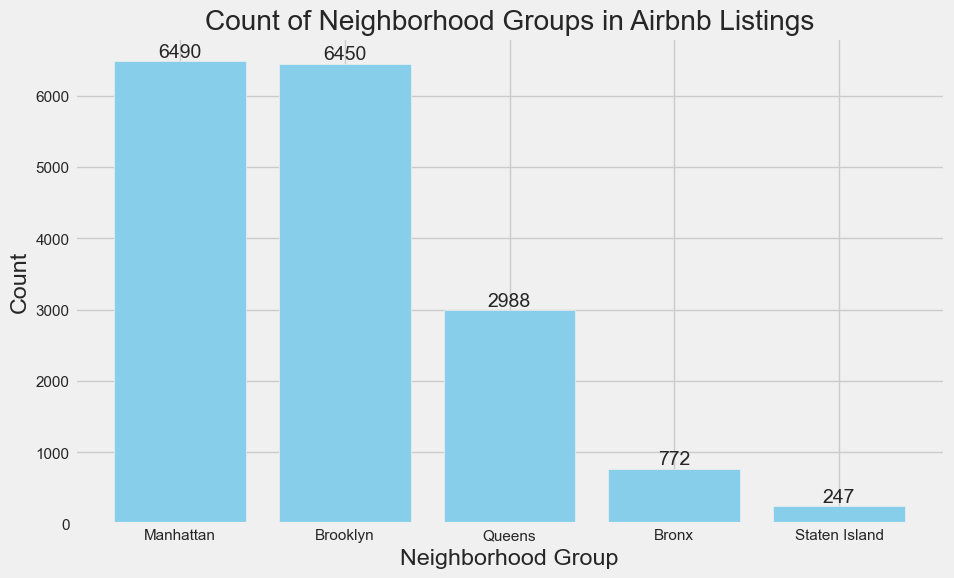

In [10]:
# Count the occurrences of each neighborhood group
neighborhood_group_counts = df['neighbourhood_group'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_group_counts.index, neighborhood_group_counts.values, color='skyblue')

# Add titles and labels
plt.title('Count of Neighborhood Groups in Airbnb Listings')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(neighborhood_group_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


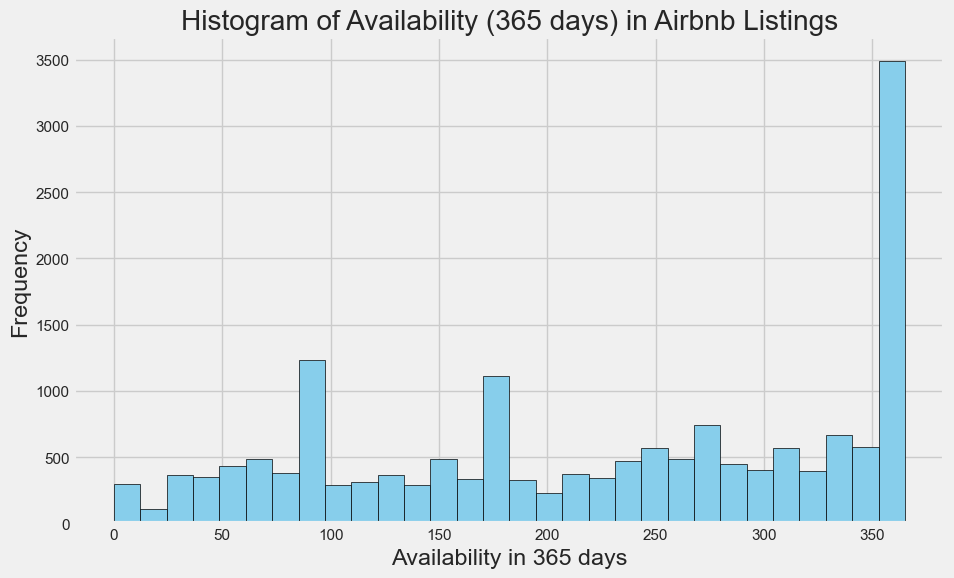

In [11]:
# Plot the histogram for availability_365
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Histogram of Availability (365 days) in Airbnb Listings')
plt.xlabel('Availability in 365 days')
plt.ylabel('Frequency')

plt.show()

In [12]:
df.describe()

id      latitude     longitude          price  \
count  1.695300e+04  16953.000000  16953.000000   16953.000000   
mean   3.462485e+17     40.725360    -73.939236     195.934679   
std    4.123269e+17      0.060747      0.061693     807.439364   
min    5.121000e+03     40.500314    -74.249840      10.000000   
25%    2.778567e+07     40.682660    -73.980950      85.000000   
50%    5.162274e+07     40.721000    -73.949350     135.000000   
75%    7.656736e+17     40.763430    -73.917430     218.000000   
max    1.126177e+18     40.911147    -73.713650  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    16953.000000       16953.000000       16953.000000   
mean        26.016345          46.419543           1.278998   
std         21.491447          79.738091           2.054920   
min          1.000000           1.000000           0.010000   
25%         30.000000           4.000000           0.230000   
50%         30.000000          16.000000           0.690000   
75%         30.000000          54.000000           1.800000   
max        730.000000        1901.000000          91.220000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    16953.000000      16953.000000           16953.000000  
mean                        21.552015        224.236915              10.928247  
std                         88.052226        113.432746              23.008294  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        121.000000               1.000000  
50%                          2.000000        240.000000               4.000000  
75%                          6.000000        339.000000              15.000000  
max                        866.000000        365.000000            1123.000000

# Regression

The regression is performed based on the following steps

1. Outlier removal (histogram, boxplot)
2. XGBoost with default hyperparameters (gives R2-score of 0.16)
3. XGBoost with grid search for hyperparameters (gives R2-score of 0.49 - best)
4. Random Forest with grid search for hyperparameters (gives R2-score of 0.46)
5. Random Forest based on important features (gives R2-score of 0.31)
6. Random Forest with PCA based on best parameters from step 4 (gives R2-score of 0.08)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Number of columns
# Get the number of columns
num_columns = df.shape[1]
print(f"Number of columns: {num_columns}")

# Ensure all data is numeric
print(df.dtypes)

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Categorical columns: ['neighbourhood_group', 'neighbourhood', 'room_type']
Number of columns: 240
latitude                  float64
longitude                 float64
price                     float64
minimum_nights            float64
number_of_reviews         float64
                           ...   
neighbourhood_Woodrow        bool
neighbourhood_Woodside       bool
room_type_Hotel room         bool
room_type_Private room       bool
room_type_Shared room        bool
Length: 240, dtype: object


## Removal of outliers

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

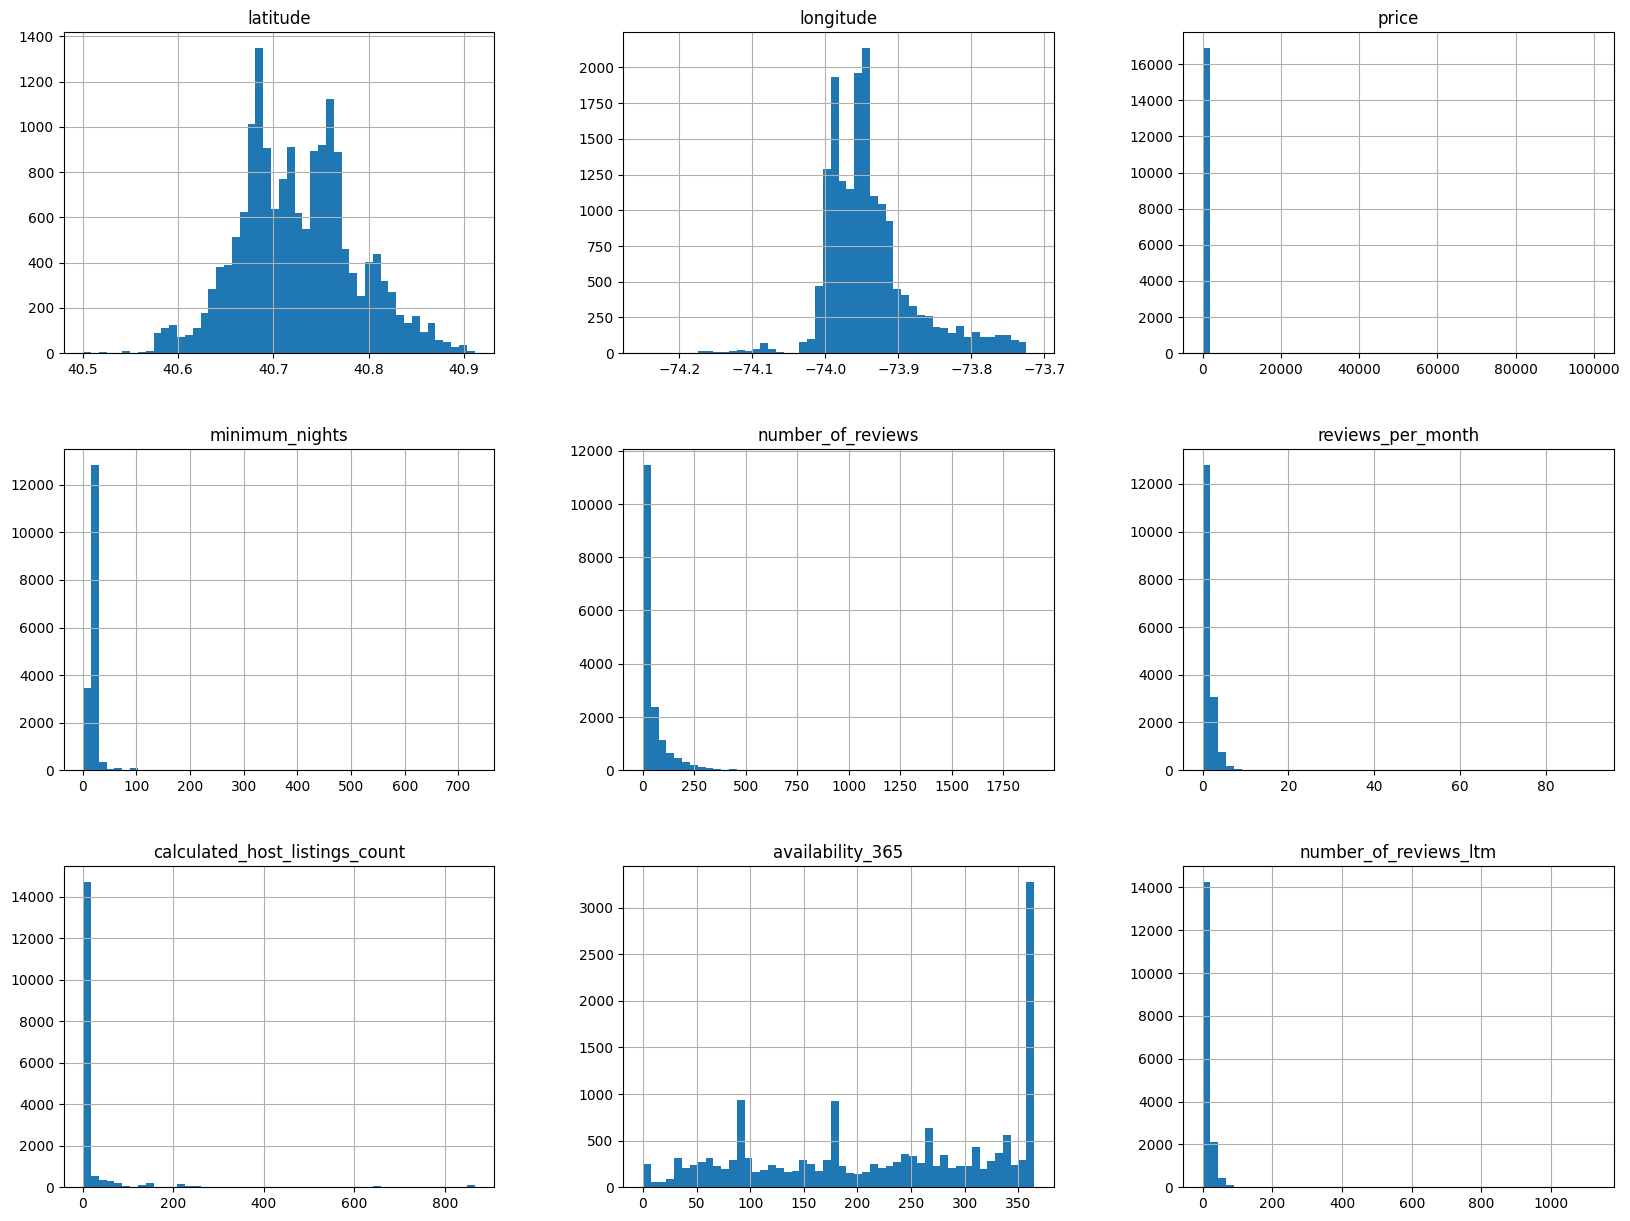

In [8]:
df.describe()
df.hist(bins=50, figsize=(20, 15))

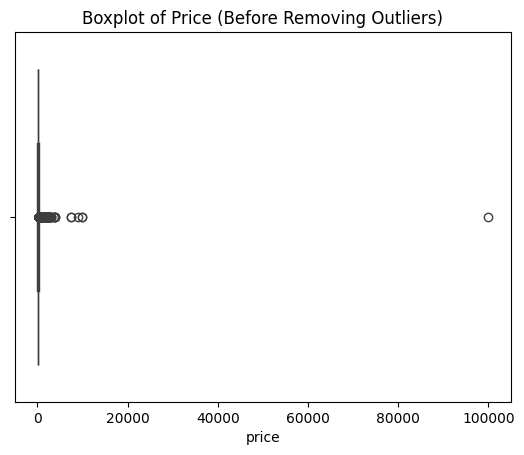

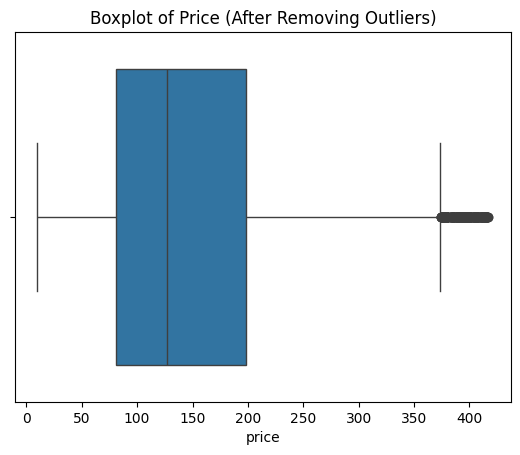

Original number of rows: 16953
Number of rows after removing outliers: 15815


In [9]:
# Create Boxplot before removing outliers
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Before Removing Outliers)')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Create Boxplot after removing outliers
sns.boxplot(x=df_filtered['price'])
plt.title('Boxplot of Price (After Removing Outliers)')
plt.show()

print(f'Original number of rows: {len(df)}')
print(f'Number of rows after removing outliers: {len(df_filtered)}')

df = df_filtered

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Initialize the XGBoost regressor with default parameters
model = xgb.XGBRegressor()

# Function to fit the model with progress bar
def fit_with_progress(estimator, X, y, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    
    progress_bar = tqdm(total=n_batches, desc="Training Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        estimator.fit(X[start:end], y[start:end], xgb_model=None, eval_metric='rmse', verbose=False)
        progress_bar.update(1)
    
    progress_bar.close()

# Function to predict with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Assuming X_train, X_test, y_train, and y_test are already defined
# Train the XGBoost model with progress bar
fit_with_progress(model, X_train, y_train)

# Make predictions with progress bar
y_pred = predict_with_progress(model, X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')


Training Progress:   0%|                                | 0/127 [00:00<?, ?it/s]/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
Prediction Progress: 100%|████████████████████| 32/32 [00:00<00:00, 1046.92it/s]

MAE: 57.540915296428814
MSE: 6272.41900718008
R-squared: 0.1660586795443193


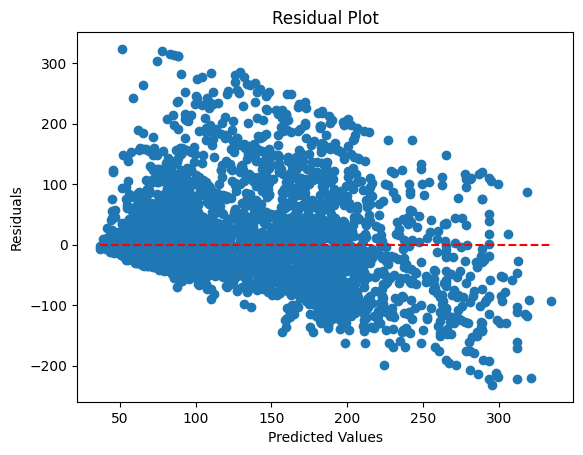

In [11]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


['f237', 'f2', 'f7', 'f149', 'f5', 'f6', 'f3', 'f4', 'f1', 'f0']


<Figure size 1500x1500 with 0 Axes>

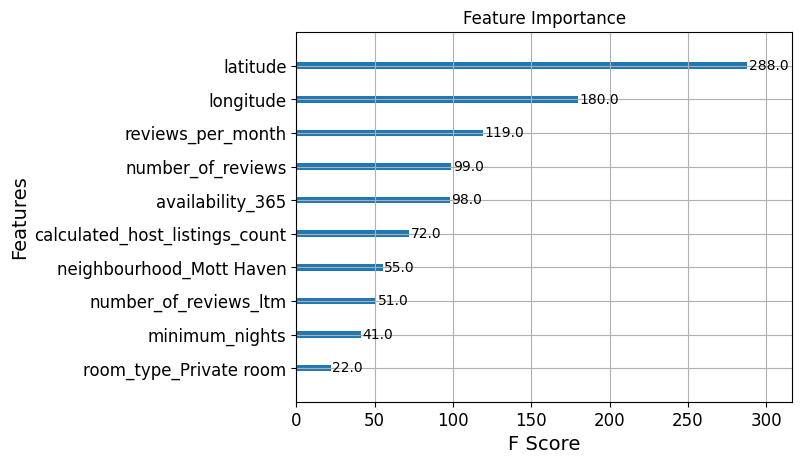

In [12]:
# Get the feature names
feature_names = df.drop('price', axis=1).columns

# Extract feature importances
booster = model.get_booster()
importance = booster.get_score(importance_type='weight')

# Create a mapping from feature index to feature name
feature_map = {f'f{index}': name for index, name in enumerate(feature_names)}

# Sort the features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance with a larger figure size
plt.figure(figsize=(15, 15))
ax = xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize=14)
plt.xlabel('F Score', fontsize=14)

# Extract the default y-tick labels
ytick_labels = [label.get_text() for label in ax.get_yticklabels()]

print(ytick_labels)

# Convert the default labels to the correct feature names
ytick_labels = [feature_map[label] for label in ytick_labels]

# Set the y-tick labels to the feature names
ax.set_yticklabels(ytick_labels)

plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE: 44.41180803250616
MSE: 3831.962267062205
R-squared: 0.49052643497315185


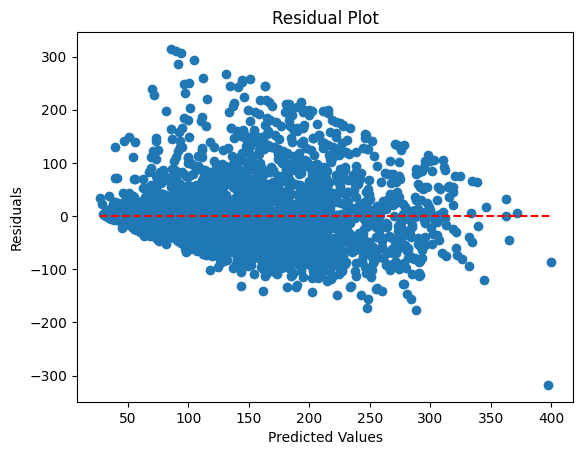

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with verbose output
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
plt.show()

## Random Forest

Prediction Progress: 100%|██████████████████████| 32/32 [00:00<00:00, 77.95it/s]


MAE: 46.72452292494501
MSE: 4032.4656906389087
R-squared: 0.4638687627701251
Best Parameters: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


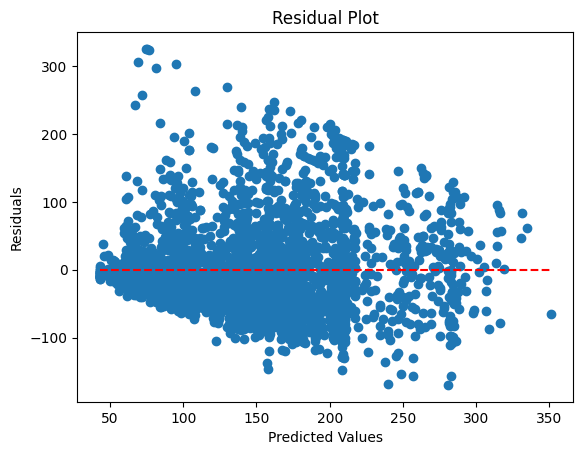

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True]
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Get all parameter combinations
param_list = list(ParameterGrid(param_grid))
n_combinations = len(param_list)

# Progress bar
progress_bar = tqdm(total=n_combinations, desc="Grid Search Progress")

# Variables to store the best results
best_score = -np.inf
best_params = None
best_model = None

# Perform grid search manually
for params in param_list:
    model.set_params(**params)
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    mean_score = scores.mean()
    
    # Update the best model if the current one is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        best_model = model
    
    progress_bar.update(1)

progress_bar.close()

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Make predictions with progress bar
y_pred = predict_with_progress(best_model, X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Best Parameters: {best_params}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [22]:
# Best hyperparameters from grid search
best_params

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

## Random Forest Regression based on Important features

In [23]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Select top N features (for example, top 10 features)
top_n = 10
top_features = importance_df['Feature'].head(top_n).values

# Alternatively, you can select features with importance above a certain threshold
# threshold = 0.01
# top_features = importance_df[importance_df['Importance'] > threshold]['Feature'].values

print(f"Top {top_n} features: {top_features}")

# Subset the data to include only the selected top features
X_train_selected = X_train[:, importance_df['Feature'].isin(top_features)]
X_test_selected = X_test[:, importance_df['Feature'].isin(top_features)]

# Train a new Random Forest model using the selected features
best_model.fit(X_train_selected, y_train)

# Make predictions and evaluate the new model
y_pred_selected = best_model.predict(X_test_selected)

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"MAE (selected features): {mae_selected}")
print(f"MSE (selected features): {mse_selected}")
print(f"R-squared (selected features): {r2_selected}")

                            Feature  Importance
237          room_type_Private room    0.401452
2                    minimum_nights    0.207572
5    calculated_host_listings_count    0.105396
1                         longitude    0.090274
0                          latitude    0.056550
..                              ...         ...
26          neighbourhood_Bellerose    0.000000
121   neighbourhood_Jamaica Estates    0.000000
122     neighbourhood_Jamaica Hills    0.000000
25       neighbourhood_Belle Harbor    0.000000
139           neighbourhood_Melrose    0.000000

[239 rows x 2 columns]
Top 10 features: ['room_type_Private room' 'minimum_nights'
 'calculated_host_listings_count' 'longitude' 'latitude'
 'availability_365' 'room_type_Shared room' 'number_of_reviews'
 'reviews_per_month' 'neighbourhood_group_Manhattan']
MAE (selected features): 55.06572433902129
MSE (selected features): 5167.7753435798495
R-squared (selected features): 0.3129251427702716


## PCA

Number of PCA components retained: 209
Shape of X_train_pca: (12652, 209)
Shape of X_test_pca: (3163, 209)


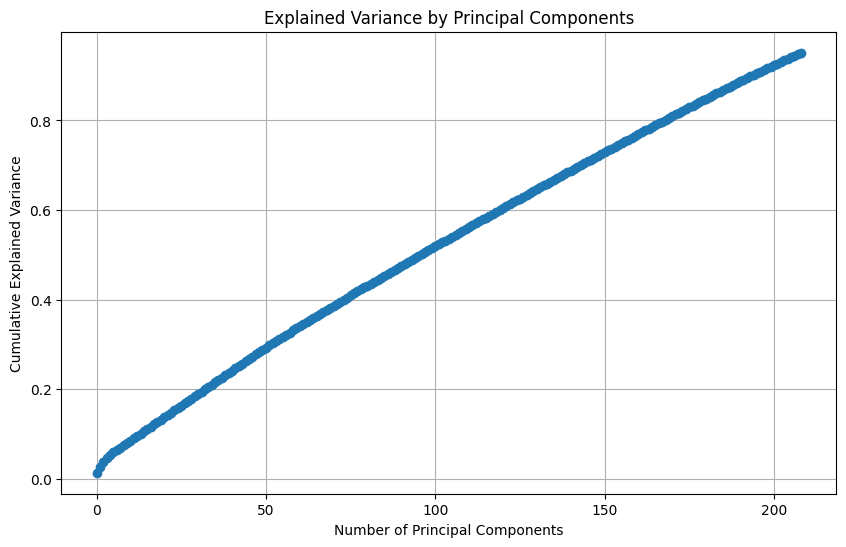

Prediction Progress: 100%|██████████████████████| 32/32 [00:00<00:00, 85.13it/s]


MAE: 64.3795540069269
MSE: 6890.165981113659
R-squared: 0.08392693315429711


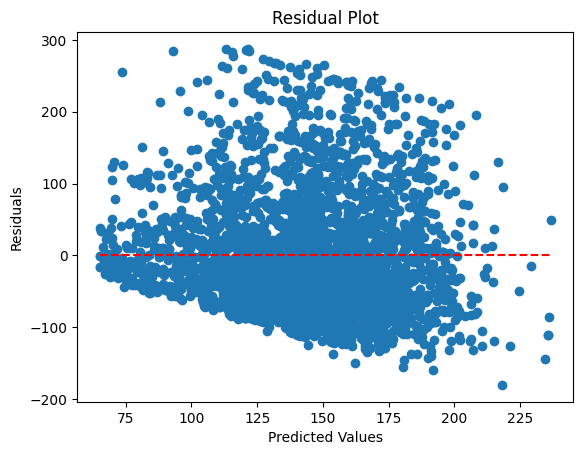

In [15]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Apply PCA with verbosity
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print number of components
print(f"Number of PCA components retained: {pca.n_components_}")

# Print shape of the PCA-transformed data
print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# print("Explained variance ratio by each component:")
# print(explained_variance)
# print("\nCumulative explained variance:")
# print(cumulative_variance)

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Function to fit the model with progress bar
def fit_with_progress(estimator, X, y, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    
    progress_bar = tqdm(total=n_batches, desc="Training Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        estimator.fit(X[start:end], y[start:end])
        progress_bar.update(1)
    
    progress_bar.close()

# Function to predict with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Initialize the RandomForestRegressor with specified parameters
# based on "best_params" from above
model = RandomForestRegressor(
    bootstrap=True,
    max_depth=7,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state=0
)

# Train the RandomForestRegressor model with progress bar
fit_with_progress(model, X_train_pca, y_train)

# Make predictions with progress bar
y_pred = predict_with_progress(model, X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## SVM Regressor

In [24]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from tqdm import tqdm
# import numpy as np

# # Parameter grid for SVR
# param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 1],
#     'kernel': ['linear', 'poly', 'rbf']
# }

# # Initialize the SVR model
# model = SVR()

# # Function to fit the model with progress bar
# def fit_with_progress(grid_search, X, y, batch_size=100):
#     n_samples = X.shape[0]
#     n_batches = int(np.ceil(n_samples / batch_size))
    
#     progress_bar = tqdm(total=n_batches, desc="Training Progress")
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = min(start + batch_size, n_samples)
#         grid_search.fit(X[start:end], y[start:end])
#         progress_bar.update(1)
    
#     progress_bar.close()

# # Function to predict with progress bar
# def predict_with_progress(estimator, X, batch_size=100):
#     n_samples = X.shape[0]
#     n_batches = int(np.ceil(n_samples / batch_size))
#     y_pred = np.zeros(n_samples)
    
#     progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = min(start + batch_size, n_samples)
#         y_pred[start:end] = estimator.predict(X[start:end])
#         progress_bar.update(1)
    
#     progress_bar.close()
#     return y_pred

# # Grid search with SVR model
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0)

# # Train the SVR model with grid search and progress bar
# fit_with_progress(grid_search, X_train, y_train)

# # Make predictions with progress bar
# y_pred = predict_with_progress(grid_search.best_estimator_, X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'R-squared: {r2}')
# print(f'Best Parameters: {grid_search.best_params_}')


In [107]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
# from tqdm import tqdm
# import numpy as np

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.1, 0.2, 0.5]
# }

# # Initialize the SVR model
# svr = SVR()

# # Calculate the total number of fits
# n_candidates = len(param_grid['kernel']) * len(param_grid['C']) * len(param_grid['epsilon'])
# total_fits = n_candidates * 5  # 5 is the number of cross-validation folds

# # Custom callback to track progress
# class TqdmProgressCallback:
#     def __init__(self, total):
#         self.progress_bar = tqdm(total=total, desc="GridSearch Progress")

#     def __call__(self, fit_params):
#         self.progress_bar.update(1)

#     def close(self):
#         self.progress_bar.close()

# # Initialize GridSearchCV with SVR and the parameter grid
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)

# # Fit GridSearchCV with progress tracking
# def fit_with_progress(grid_search, X_train, y_train, total_fits):
#     progress_callback = TqdmProgressCallback(total_fits)

#     # Wrap the fit method to include the progress callback
#     def _fit_and_score(*args, **kwargs):
#         result = original_fit_and_score(*args, **kwargs)
#         progress_callback()
#         return result

#     # Replace the original _fit_and_score method
#     from sklearn.model_selection._validation import _fit_and_score as original_fit_and_score
#     grid_search._fit_and_score = _fit_and_score

#     # Fit the GridSearchCV
#     grid_search.fit(X_train, y_train)
#     progress_callback.close()

# # Fit GridSearchCV to find the best parameters with progress bar
# fit_with_progress(grid_search, X_train, y_train, total_fits)

# # Train the SVR model with the best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'R-squared: {r2}')
